[212 213 212 ...  19  19  20]
[856.87765777 861.97656687 856.87765777 ...  40.94337043  40.94337043
  43.67857568]
95 49 37


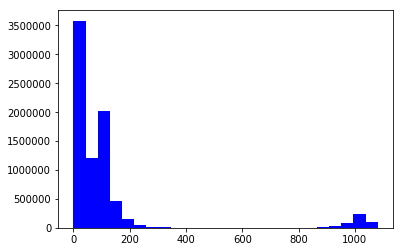

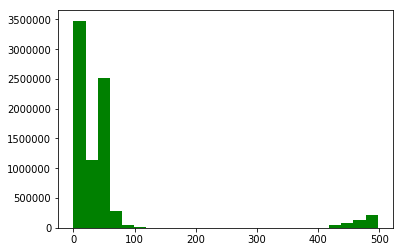

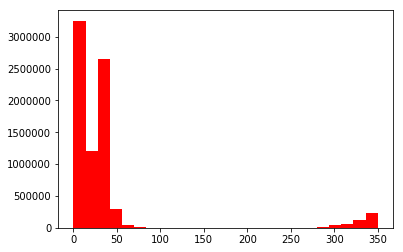

In [36]:
#Part 2
#image0
import cv2
from PIL import Image
from pylab import *
import os
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize


aB, kB = 0.7931811292267519, 7.671821020752863
aG, kG = 0.8922869233434757, 8.050750156307846
aR, kR = 0.9458954377758524, 8.259611952470378

image0 = cv2.imread('600D/hdrset2/IMG_2646.jpeg', cv2.IMREAD_COLOR)
b0, g0, r0 = cv2.split(image0)
bf0 = b0.flatten()
gf0 = g0.flatten()
rf0 = r0.flatten()
print(bf0)
bf0G = bf0 ** (1 / aB)
gf0G = gf0 ** (1 / aG)
rf0G = rf0 ** (1 / aR)
print(bf0G)
brightnessB0G = (sum(bf0) / len(bf0)) ** (1 / aB)
brightnessG0G = (sum(gf0) / len(gf0)) ** (1 / aG)
brightnessR0G = (sum(rf0) / len(rf0)) ** (1 / aR)
print(int(brightnessB0G), int(brightnessG0G), int(brightnessR0G))

hist(bf0G, 25, facecolor = 'blue')
plt.show()
hist(gf0G, 25, facecolor = 'green')
plt.show()
hist(rf0G, 25, facecolor = 'red')
plt.show()

In [38]:
#determin if picture has saturated pixels
def isSaturated(matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if matrix[i][j] == 255:
                print('saturated')
                return False
    return True
print(isSaturated(b0))

saturated
False


[867.0817217  867.0817217  877.31068234 ...  66.75730814  72.8240508
  75.89766421]
140 82 65


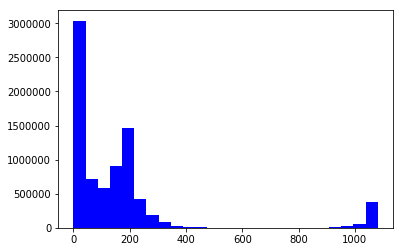

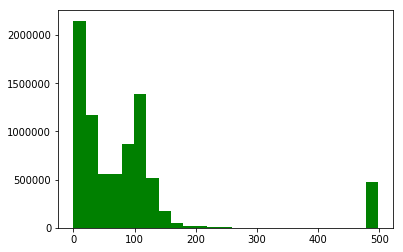

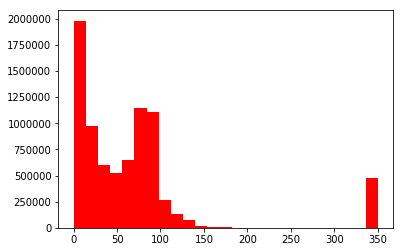

In [5]:
#image1
image1 = cv2.imread('600D/hdrset2/IMG_2649.JPG', cv2.IMREAD_COLOR)
b1, g1, r1 = cv2.split(image1)
bf1 = b1.flatten()
gf1 = g1.flatten()
rf1 = r1.flatten()
bf1G = bf1 ** (1 / aB)
gf1G = gf1 ** (1 / aG)
rf1G = rf1 ** (1 / aR)
print(bf1G)
brightnessB1 = (sum(bf1) / len(bf1)) ** (1 / aB)
brightnessG1 = (sum(gf1) / len(gf1)) ** (1 / aG)
brightnessR1 = (sum(rf1) / len(rf1)) ** (1 / aR)
print(int(brightnessB1), int(brightnessG1), int(brightnessR1))
hist(bf1G, 25, facecolor = 'blue')
plt.show()
hist(gf1G, 25, facecolor = 'green')
plt.show()
hist(rf1G, 25, facecolor = 'red')
plt.show()

286 155 119


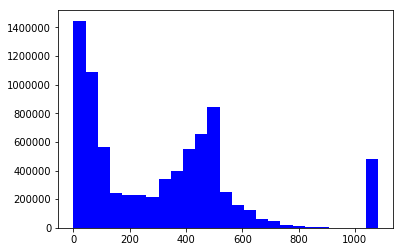

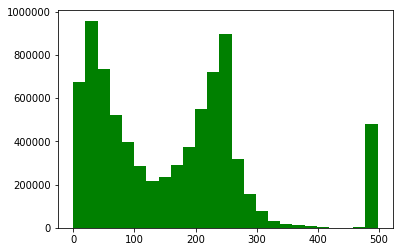

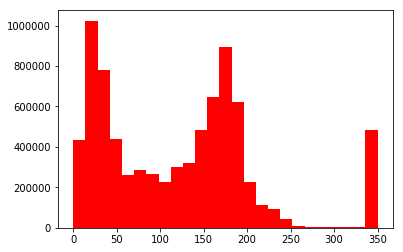

In [6]:
#image2
image2 = cv2.imread('600D/hdrset2/IMG_2653.JPG', cv2.IMREAD_COLOR)
b2, g2, r2 = cv2.split(image2)
bf2 = b2.flatten()
gf2 = g2.flatten()
rf2 = r2.flatten()
bf2G = bf2 ** (1 / aB)
gf2G = gf2 ** (1 / aG)
rf2G = rf2 ** (1 / aR)
brightnessB2 = (sum(bf2) / len(bf2)) ** (1 / aB)
brightnessG2 = (sum(gf2) / len(gf2)) ** (1 / aG)
brightnessR2 = (sum(rf2) / len(rf2)) ** (1 / aR)
print(int(brightnessB2), int(brightnessG2), int(brightnessR2))
hist(bf2G, 25, facecolor = 'blue')
plt.show()
hist(gf2G, 25, facecolor = 'green')
plt.show()
hist(rf2G, 25, facecolor = 'red')
plt.show()

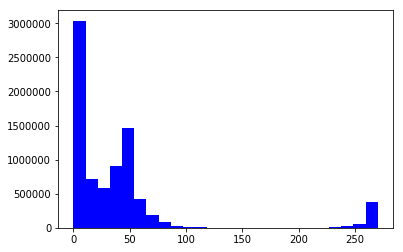

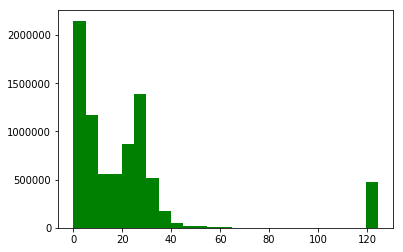

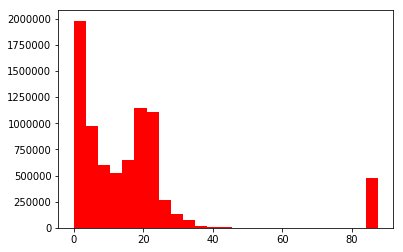

In [7]:
#B'g/a1
a1 = 4
bf1GDivideA1 = (bf1 ** (1 / aB)) / a1
gf1GDivideA1 = (gf1 ** (1 / aG)) / a1
rf1GDivideA1 = (rf1 ** (1 / aR)) / a1
hist(bf1GDivideA1, 25, facecolor = 'blue')
plt.show()
hist(gf1GDivideA1, 25, facecolor = 'green')
plt.show()
hist(rf1GDivideA1, 25, facecolor = 'red')
plt.show()

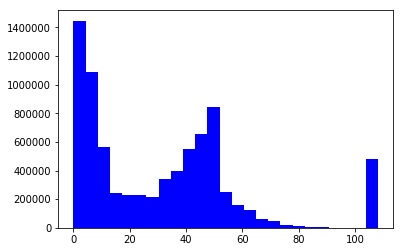

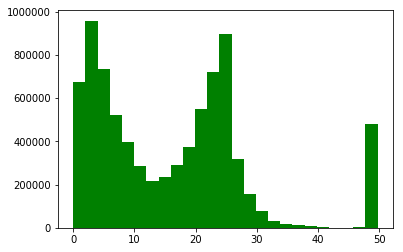

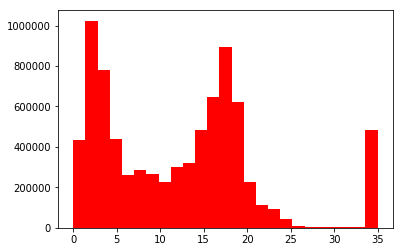

In [8]:
#B'g/a2
a2 = 10
bf2GDivideA2 = (bf2 ** (1 / aB)) / a2
gf2GDivideA2 = (gf2 ** (1 / aG)) / a2
rf2GDivideA2 = (rf2 ** (1 / aR)) / a2
hist(bf2GDivideA2, 25, facecolor = 'blue')
plt.show()
hist(gf2GDivideA2, 25, facecolor = 'green')
plt.show()
hist(rf2GDivideA2, 25, facecolor = 'red')
plt.show()

In [9]:
#Part 3
#algorithm 1
hdr1B = [[0] * 3456 for _ in range(2304)]
print(len(hdr1B[1]))
f = 0
for i in range(len(hdr1B)):
    for j in range(len(hdr1B[0])):
        if bf2[f] < 255:
            hdr1B[i][j] = bf2GDivideA2[f]
        elif bf1[f] < 255:
            hdr1B[i][j] = bf1GDivideA1[f]
        elif bf0[f] < 255:
            hdr1B[i][j] = bf0G[f]
        f += 1

3456


In [10]:
hdr1BA = array(hdr1B, 'f')
hdr1BF = hdr1BA.flatten()
#hist(hdr1B, 25, facecolor = 'blue')

(array([5.242464e+06, 2.235065e+06, 1.312200e+04, 5.520000e+02,
        7.570000e+02, 9.153700e+04, 6.777400e+04, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 2.415000e+03, 3.102300e+04, 1.244960e+05,
        1.534190e+05]),
 array([   0.      ,   43.047176,   86.09435 ,  129.14154 ,  172.1887  ,
         215.23589 ,  258.28308 ,  301.33023 ,  344.3774  ,  387.4246  ,
         430.47177 ,  473.51895 ,  516.56616 ,  559.6133  ,  602.66046 ,
         645.70764 ,  688.7548  ,  731.802   ,  774.8492  ,  817.89636 ,
         860.94354 ,  903.9907  ,  947.0379  ,  990.0851  , 1033.1323  ,
        1076.1794  ], dtype=float32),
 <a list of 25 Patch objects>)

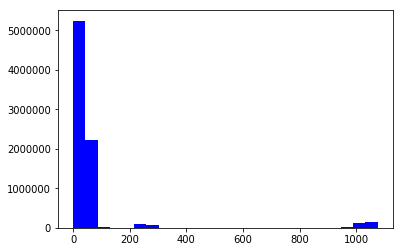

In [11]:
hist(hdr1BF, 25, facecolor = 'blue')

In [12]:
#hdr1 green
hdr1G = [[0] * 3456 for _ in range(2304)]
print(len(hdr1G[1]))
f = 0
for i in range(len(hdr1G)):
    for j in range(len(hdr1G[0])):
        if gf2[f] < 255:
            hdr1G[i][j] = gf2GDivideA2[f]
        elif gf1[f] < 255:
            hdr1G[i][j] = gf1GDivideA1[f]
        elif gf0[f] < 255:
            hdr1G[i][j] = gf0G[f]
        f += 1
        


3456


In [13]:
hdr1GA = array(hdr1G, 'f')
hdr1GF = hdr1GA.flatten()

(array([4.684958e+06, 2.790444e+06, 1.437100e+04, 3.290000e+02,
        6.280000e+02, 1.299000e+03, 9.410900e+04, 0.000000e+00,
        1.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00, 0.000000e+00, 3.000000e+00,
        2.000000e+00, 2.000000e+00, 2.000000e+00, 5.000000e+00,
        1.400000e+01, 2.600000e+01, 2.877800e+04, 1.212030e+05,
        2.264470e+05]),
 array([  0.      ,  19.82417 ,  39.64834 ,  59.472507,  79.29668 ,
         99.12084 , 118.945015, 138.76918 , 158.59335 , 178.41751 ,
        198.24168 , 218.06586 , 237.89003 , 257.7142  , 277.53836 ,
        297.36252 , 317.1867  , 337.01086 , 356.83502 , 376.6592  ,
        396.48337 , 416.30756 , 436.1317  , 455.95587 , 475.78006 ,
        495.60422 ], dtype=float32),
 <a list of 25 Patch objects>)

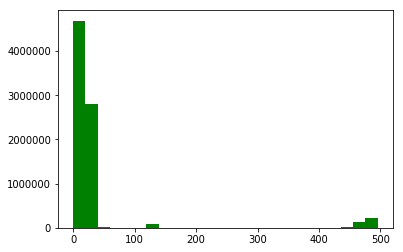

In [14]:
hist(hdr1GF, 25, facecolor = 'green')

In [15]:
#hdr1 red
hdr1R = [[0] * 3456 for _ in range(2304)]
print(len(hdr1R[1]))
f = 0
for i in range(len(hdr1R)):
    for j in range(len(hdr1R[0])):
        if rf2[f] < 255:
            hdr1R[i][j] = rf2GDivideA2[f]
        elif rf1[f] < 255:
            hdr1R[i][j] = rf1GDivideA1[f]
        elif rf0[f] < 255:
            hdr1R[i][j] = rf0G[f]
        f += 1

3456


In [16]:
hdr1RA = array(hdr1R, 'f')
hdr1RF = hdr1RA.flatten()

(array([4.352552e+06, 3.162598e+06, 1.740800e+04, 6.510000e+02,
        1.390000e+03, 2.157000e+03, 7.436500e+04, 5.000000e+00,
        2.200000e+01, 1.800000e+01, 1.600000e+01, 1.100000e+01,
        1.800000e+01, 8.000000e+00, 1.800000e+01, 2.700000e+01,
        3.100000e+01, 3.300000e+01, 4.500000e+01, 1.010000e+02,
        9.814000e+03, 4.276800e+04, 2.931500e+04, 6.594300e+04,
        2.033100e+05]),
 array([  0.      ,  13.945963,  27.891926,  41.83789 ,  55.78385 ,
         69.72981 ,  83.67578 ,  97.62174 , 111.5677  , 125.51367 ,
        139.45963 , 153.4056  , 167.35156 , 181.29752 , 195.24348 ,
        209.18945 , 223.1354  , 237.08138 , 251.02734 , 264.9733  ,
        278.91925 , 292.86523 , 306.8112  , 320.75714 , 334.70312 ,
        348.64908 ], dtype=float32),
 <a list of 25 Patch objects>)

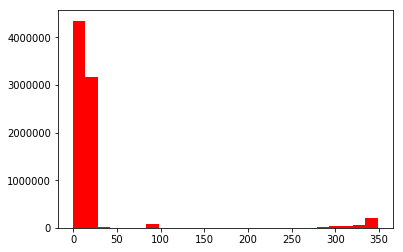

In [17]:
hist(hdr1RF, 25, facecolor = 'red')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

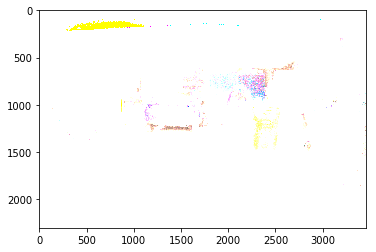

In [31]:
item = cv2.merge((hdr1BA, hdr1GA, hdr1RA))

imshow(item)
cv2.imwrite('600D_2-17_1ori.jpg', item)

In [20]:
#algorithm 2
hdr2B = [[0] * 3456 for _ in range(2304)]
print(len(hdr2B[1]))
f = 0
for i in range(len(hdr2B)):
    for j in range(len(hdr2B[0])):
        if bf2[f] < 255:
            hdr2B[i][j] = bf2GDivideA2[f]
        elif bf1[f] < 255:
            hdr2B[i][j] = (bf1GDivideA1[f] + bf2GDivideA2[f]) / 2
        elif bf0[f] < 255:
            hdr2B[i][j] = (bf0G[f] + bf1GDivideA1[f] + bf2GDivideA2[f]) / 3
        f += 1

3456


(array([3.448583e+06, 1.303740e+06, 2.369483e+06, 3.370310e+05,
        2.466400e+04, 7.127000e+03, 4.700000e+02, 5.840000e+02,
        8.886000e+03, 1.507030e+05, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 5.676000e+03, 8.011800e+04,
        2.255590e+05]),
 array([  0.      ,  19.396172,  38.792343,  58.18851 ,  77.58469 ,
         96.98085 , 116.37702 , 135.7732  , 155.16937 , 174.56554 ,
        193.9617  , 213.35788 , 232.75404 , 252.15022 , 271.5464  ,
        290.94257 , 310.33875 , 329.7349  , 349.13107 , 368.52725 ,
        387.9234  , 407.31958 , 426.71576 , 446.11194 , 465.5081  ,
        484.90427 ], dtype=float32),
 <a list of 25 Patch objects>)

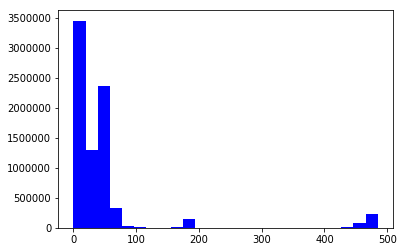

In [21]:
hdr2BA = array(hdr2B, 'f')
hdr2BF = hdr2BA.flatten()
hist(hdr2BF, 25, facecolor = 'blue')

In [22]:
hdr2G = [[0] * 3456 for _ in range(2304)]
print(len(hdr2G[1]))
f = 0
for i in range(len(hdr2G)):
    for j in range(len(hdr2G[0])):
        if gf2[f] < 255:
            hdr2G[i][j] = gf2GDivideA2[f]
        elif gf1[f] < 255:
            hdr2G[i][j] = (gf1GDivideA1[f] + gf2GDivideA2[f]) / 2
        elif gf0[f] < 255:
            hdr2G[i][j] = (gf0G[f] + gf1GDivideA1[f] + gf2GDivideA2[f]) / 3
        f += 1

3456


(array([3.116063e+06, 1.193471e+06, 2.721208e+06, 4.216380e+05,
        2.887700e+04, 8.505000e+03, 2.320000e+02, 5.310000e+02,
        7.540000e+02, 9.485900e+04, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 2.000000e+00, 3.000000e+00, 2.000000e+00,
        4.000000e+00, 1.300000e+01, 1.330000e+02, 9.790500e+04,
        2.784200e+05]),
 array([  0.      ,   8.931084,  17.862167,  26.793251,  35.724335,
         44.65542 ,  53.586502,  62.517582,  71.44867 ,  80.37975 ,
         89.31084 ,  98.24192 , 107.173004, 116.10408 , 125.035164,
        133.96625 , 142.89734 , 151.82841 , 160.7595  , 169.69058 ,
        178.62167 , 187.55275 , 196.48384 , 205.41492 , 214.34601 ,
        223.27708 ], dtype=float32),
 <a list of 25 Patch objects>)

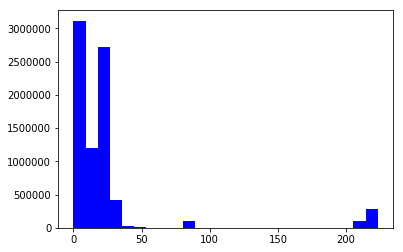

In [23]:
hdr2GA = array(hdr2G, 'f')
hdr2GF = hdr2GA.flatten()
hist(hdr2GF, 25, facecolor = 'blue')

In [24]:
hdr2R = [[0] * 2356 for _ in range(2304)]
print(len(hdr2R[1]))
f = 0
for i in range(len(hdr2R)):
    for j in range(len(hdr2R[0])):
        if rf2[f] < 255:
            hdr2R[i][j] = rf2GDivideA2[f]
        elif rf1[f] < 255:
            hdr2R[i][j] = (rf1GDivideA1[f] + rf2GDivideA2[f]) / 2
        elif rf0[f] < 255:
            hdr2R[i][j] = (rf0G[f] + rf1GDivideA1[f] + rf2GDivideA2[f]) / 3
        f += 1

2356


(array([2.720175e+06, 1.018729e+06, 7.381160e+05, 4.913590e+05,
        1.933700e+04, 1.041300e+04, 4.590000e+02, 1.098000e+03,
        1.521000e+03, 7.549500e+04, 8.000000e+00, 1.300000e+01,
        1.800000e+01, 3.100000e+01, 1.700000e+01, 2.100000e+01,
        1.300000e+01, 2.600000e+01, 3.700000e+01, 5.500000e+01,
        7.800000e+01, 7.291000e+03, 5.521200e+04, 4.232100e+04,
        2.463810e+05]),
 array([  0.      ,   6.282457,  12.564914,  18.84737 ,  25.129827,
         31.412283,  37.69474 ,  43.977196,  50.259655,  56.54211 ,
         62.824566,  69.107025,  75.38948 ,  81.671936,  87.95439 ,
         94.23685 , 100.51931 , 106.801765, 113.08422 , 119.36668 ,
        125.64913 , 131.9316  , 138.21405 , 144.4965  , 150.77896 ,
        157.06142 ], dtype=float32),
 <a list of 25 Patch objects>)

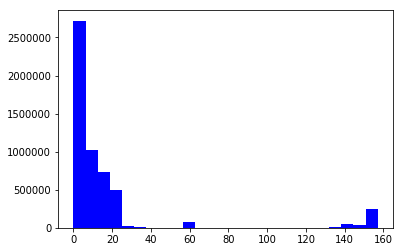

In [25]:
hdr2RA = array(hdr2R, 'f')
hdr2RF = hdr2RA.flatten()
hist(hdr2RF, 25, facecolor = 'blue')

In [34]:
item2 = cv2.merge((hdr2BA, hdr2GA, hdr2RA))
imshow(item2)
cv2.imwrite('600D_2-17_2ori.jpg', item2)

error: OpenCV(3.4.2) /tmp/opencv-20180704-99354-1kt9ska/opencv-3.4.2/modules/core/src/merge.cpp:458: error: (-215:Assertion failed) mv[i].size == mv[0].size && mv[i].depth() == depth in function 'merge'


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


True

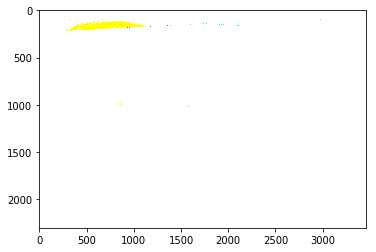

In [39]:
#Part 4
tonemap = cv2.createTonemapDrago(1.0, 0.7)
ldrB = tonemap.process(hdr1BA)
ldrG = tonemap.process(hdr1GA)
ldrR = tonemap.process(hdr1RA)
ldr = cv2.merge((hdr1BA, hdr1GA, hdr1RA))


ldr = 3 * ldr
imshow(ldr)
cv2.imwrite('2-20_1.jpg', ldr)

In [29]:
tonemap2 = cv2.createTonemap(0.25)
ldr2 = tonemap.process(item2)
ldr2 = 3 * ldr2
imshow(ldr2)
cv2.imwrite('600D_2-17_2.jpg', ldr * 255)

NameError: name 'item2' is not defined